In [40]:
import numpy as np
import matplotlib.pyplot as plt

adjoint_gpu = np.load('../../time_result_adjoint_GPU.npy')
tfnn_gpu = np.load('../../time_result_TFNN_GPU.npy')
tfnn_cpu = np.load('../../time_result_TFNN_CPU.npy')

layer_nums = np.load('../../time_result_layernumber.npy')



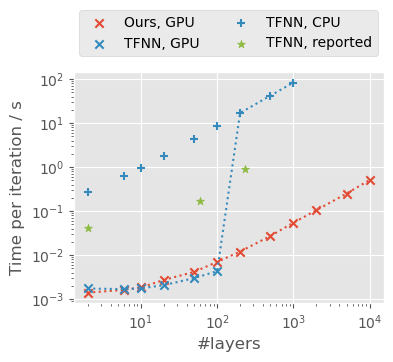

In [69]:
plt.style.use('ggplot') 
fig, ax = plt.subplots(1, 1)
ax.scatter(layer_nums, adjoint_gpu, label='Ours, GPU', color='C0', marker='x')
ax.scatter(layer_nums[:tfnn_gpu.shape[0]], tfnn_gpu, label='TFNN, GPU', color='C1', marker='x')
ax.scatter(layer_nums[:tfnn_cpu.shape[0]], tfnn_cpu, label='TFNN, CPU', color='C1', marker='+')

ax.plot(layer_nums, adjoint_gpu, color='C0', ls=':')
ax.plot(layer_nums[:tfnn_cpu.shape[0]], np.hstack((tfnn_gpu, tfnn_cpu[tfnn_gpu.shape[0]:])), color='C1', ls=':')

ax.scatter([2, 60, 232], [0.042, 0.166, 0.924], color='C5', marker='*', label='TFNN, reported')

ax.legend(ncols=2, loc='upper center', bbox_to_anchor=(0.5, 1.3))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('#layers')
ax.set_ylabel('Time per iteration / s')
# ax.set_xlim(1, 2e4)
# ax.set_ylim(1e-3, 2e2)

fig.set_size_inches(4, 3)
fig.savefig('time_compare.png', dpi=300, bbox_inches='tight')
